In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn import tree
! git clone https://github.com/ruili4UCSD/CSE151A_WIN24_GROUP.git

# from google.colab import files
! mkdir ~/.kaggle
! cp ./CSE151A_WIN24_GROUP/data/kaggle.json ~/.kaggle/  # please do not change kaggle.json path
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d gzipchrist/leetcode-problem-dataset --path 'CSE151A_WIN24_GROUP/data/dataset/'
! unzip 'CSE151A_WIN24_GROUP/data/dataset/leetcode-problem-dataset.zip' -d "CSE151A_WIN24_GROUP/data/dataset/"

fatal: destination path 'CSE151A_WIN24_GROUP' already exists and is not an empty directory.
mkdir: cannot create directory ‘/root/.kaggle’: File exists
leetcode-problem-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  CSE151A_WIN24_GROUP/data/dataset/leetcode-problem-dataset.zip
replace CSE151A_WIN24_GROUP/data/dataset/leetcode_dataset - lc.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CSE151A_WIN24_GROUP/data/dataset/leetcode_dataset - lc.csv  


# Data Set Exploration


## Import Dataset

In [144]:
raw_data = pd.read_csv("CSE151A_WIN24_GROUP/data/dataset/leetcode_dataset - lc.csv")

In [145]:
print("Dataset head: \n")
display(raw_data.head())

print("\nDataset info: \n")
print(raw_data.info)

print("\nDataset null data sum: \n")
display(raw_data.isnull().sum())

Dataset head: 



id                                           title  \
0   1                                         Two Sum   
1   2                                 Add Two Numbers   
2   3  Longest Substring Without Repeating Characters   
3   4                     Median of Two Sorted Arrays   
4   5                   Longest Palindromic Substring   

                                         description  is_premium difficulty  \
0  Given an array of integers `nums` and an integ...           0       Easy   
1  You are given two non-empty linked lists repre...           0     Medium   
2  Given a string `s`, find the length of the lon...           0     Medium   
3  Given two sorted arrays `nums1` and `nums2` of...           0       Hard   
4  Given a string `s`, return the longest palindr...           0     Medium   

                                       solution_link  acceptance_rate  \
0                                  /articles/two-sum             46.7   
1                          /articles/add-two-numbers             35.7   
2  /articles/longest-substring-without-repeating-...             31.5   
3              /articles/median-of-two-sorted-arrays             31.4   
4            /articles/longest-palindromic-substring             30.6   

   frequency                                                url  \
0      100.0              https://leetcode.com/problems/two-sum   
1       93.1      https://leetcode.com/problems/add-two-numbers   
2       90.9  https://leetcode.com/problems/longest-substrin...   
3       86.2  https://leetcode.com/problems/median-of-two-so...   
4       84.7  https://leetcode.com/problems/longest-palindro...   

   discuss_count accepted submissions  \
0            999     4.1M        8.7M   
1            999     1.9M        5.2M   
2            999     2.1M        6.7M   
3            999   904.7K        2.9M   
4            999     1.3M        4.1M   

                                           companies  \
0  Amazon,Google,Apple,Adobe,Microsoft,Bloomberg,...   
1  Bloomberg,Microsoft,Amazon,Google,Facebook,App...   
2  Amazon,Bloomberg,Microsoft,Facebook,Apple,Adob...   
3  Amazon,Goldman Sachs,Facebook,Microsoft,Apple,...   
4  Amazon,Microsoft,Wayfair,Facebook,Adobe,eBay,G...   

                                  related_topics  likes  dislikes  rating  \
0                               Array,Hash Table  20217       712      97   
1                     Linked List,Math,Recursion  11350      2704      81   
2  Hash Table,Two Pointers,String,Sliding Window  13810       714      95   
3         Array,Binary Search,Divide and Conquer   9665      1486      87   
4                     String,Dynamic Programming  10271       670      94   

   asked_by_faang                                  similar_questions  
0               1  [3Sum, /problems/3sum/, Medium], [4Sum, /probl...  
1               1  [Multiply Strings, /problems/multiply-strings/...  
2               1  [Longest Substring with At Most Two Distinct C...  
3               1                                                NaN  
4               1  [Shortest Palindrome, /problems/shortest-palin...


Dataset info: 

<bound method DataFrame.info of         id                                           title  \
0        1                                         Two Sum   
1        2                                 Add Two Numbers   
2        3  Longest Substring Without Repeating Characters   
3        4                     Median of Two Sorted Arrays   
4        5                   Longest Palindromic Substring   
...    ...                                             ...   
1820  1821  Find Customers With Positive Revenue this Year   
1821  1822                 Sign of the Product of an Array   
1822  1823            Find the Winner of the Circular Game   
1823  1824                           Minimum Sideway Jumps   
1824  1825                              Finding MK Average   

                                            description  is_premium  \
0     Given an array of integers `nums` and an integ...           0   
1     You are given two non-empty linked lists repre...         

id                      0
title                   0
description             0
is_premium              0
difficulty              0
solution_link         838
acceptance_rate         0
frequency               0
url                     0
discuss_count           0
accepted                0
submissions             0
companies              76
related_topics        254
likes                   0
dislikes                0
rating                  0
asked_by_faang          0
similar_questions    1080
dtype: int64

## Dataset Attribute Descriptions

The dataset we have chosen to work with is related to Leetcode, which is one of the largest interview coding prep platforms on the internet, with a huge catalog of coding problems ranked easy, medium, and hard.

The total number of observations that have been gathered for this dataset is 1825. We have considered that this is an appropriate number of observations, with enough data to perform a correct analysis and modeling but not so many as to need to subsample the dataset.

For each of these observations we have 19 distinct features. However, we have decided to drop 6 of the columns for the purpose of our analysis, since they are not relevant to our project.

Our target is difficulty. That is, with this project our aim is to predict whether the problem is considered easy, medium or hard.


| Column Name         | Data Type | # of Null | Description |
|---------------------|-----------|-----------|-------------|
| id                  | int64     | 0         | Unique problem id. |
| title               | String    | 0         | name of the problem. |
| description         | String    | 0         | problem description. |
| is_premium          | int64     | 0         | whether the question requires a premium account). This has been encoded as a number where the only possible values are 0 or 1, and 1 implies that the question does require a premium account. |
| difficulty          | String    | 0         | The level of difficulty of the entry (e.g., Easy, Medium, Hard). |
| solution_link       | String    | 838       | link to the solution for the problem. |
| acceptance_rate     | float64   | 0         | how often the answer submitted is correct). This is a float value indicating the percentage of acceptance, ranging from 13.9 to 95.6 in the case of our dataset but with a possible range of values between 0 and 100. |
| frequency           | float64   | 0         | how often the problem is attempted). This is also in the form of percentage. |
| url                 | String    | 0         | url to the problem. |
| discuss_count       | int64     | 0         | (how many comments are submitted by users). For this feature we have observed that there is a maximum count of 999, which means that there could be problems with that value that could go well over this limit or stay close to it. |
| accepted            | String    | 0         | how many times the answer was accepted). This has been encoded in the dataset as a string, where the value is encoded either as valueK, indicating that the value is in the thousands, or valueM, placing the value in the millions. However, for our project, we will convert this value to a number. |
| submissions         | String    | 0         | how many times the answer was submitted). This feature has the same characteristics as the previous feature, so we will perform the same modification. |
| companies           | String    | 76        | which companies were tagged as having asked this specific problem. |
| related_topics      | String    | 254       | (topics related to the current problem). This feature is given as a string of the different topics that the problem is associated with. However, as will be observed in the analysis, we have decided to use one-hot encoding in order to be able to work with this feature. It is also important to note that there is a 14% of null values, meaning that 14% of our observations don’t have any value for this feature. |
| likes               | int64     | 0         | how many likes the problem got). Integer value ranging from 2 to 20,200. |
| dislikes            | int64     | 0         | how many dislikes the problem got). Integer value ranging from 0 to 8900. |
| rating              | int64     | 0         | This feature is a combination of the previous 2 features. It is computed as likes/(likes+dislikes). Therefore, this is encoded in the form of percentage, ranging in the case of our dataset between 7 and 100. |
| asked_by_faang      | int64     | 0         | whether or not the question was asked by facebook, apple, amazon, google, or netflix. |
| similar_questions   | String    | 1080      | A list of similar entries, possibly including titles, links, and difficulty levels. |

##  Data Scales and Data Distributions

- Analyze the distribution of topics and difficulty levels, and the relationship between the two.
- Explore the correlation between problem difficulty and other factors such as acceptence rate, frequency, submissions, related topics, and the like-to-dislike ratio.

In [146]:
raw_data.describe()

id   is_premium  acceptance_rate    frequency  discuss_count  \
count  1825.000000  1825.000000      1825.000000  1825.000000    1825.000000   
mean    913.000000     0.218082        53.139616    21.113041     421.435068   
std     526.976438     0.413057        14.778411    22.364741     330.583617   
min       1.000000     0.000000        13.900000     0.000000       9.000000   
25%     457.000000     0.000000        42.400000     3.100000     150.000000   
50%     913.000000     0.000000        51.600000    13.500000     292.000000   
75%    1369.000000     0.000000        62.800000    31.800000     663.000000   
max    1825.000000     1.000000        95.600000   100.000000     999.000000   

              likes     dislikes       rating  asked_by_faang  
count   1825.000000  1825.000000  1825.000000     1825.000000  
mean    1050.534795   279.010959    77.391233        0.671233  
std     1512.674013   608.489206    23.317515        0.469894  
min        2.000000     0.000000     7.000000        0.000000  
25%      217.000000    32.000000    67.000000        0.000000  
50%      516.000000    92.000000    88.000000        1.000000  
75%     1200.000000   239.000000    95.000000        1.000000  
max    20217.000000  8900.000000   100.000000        1.000000

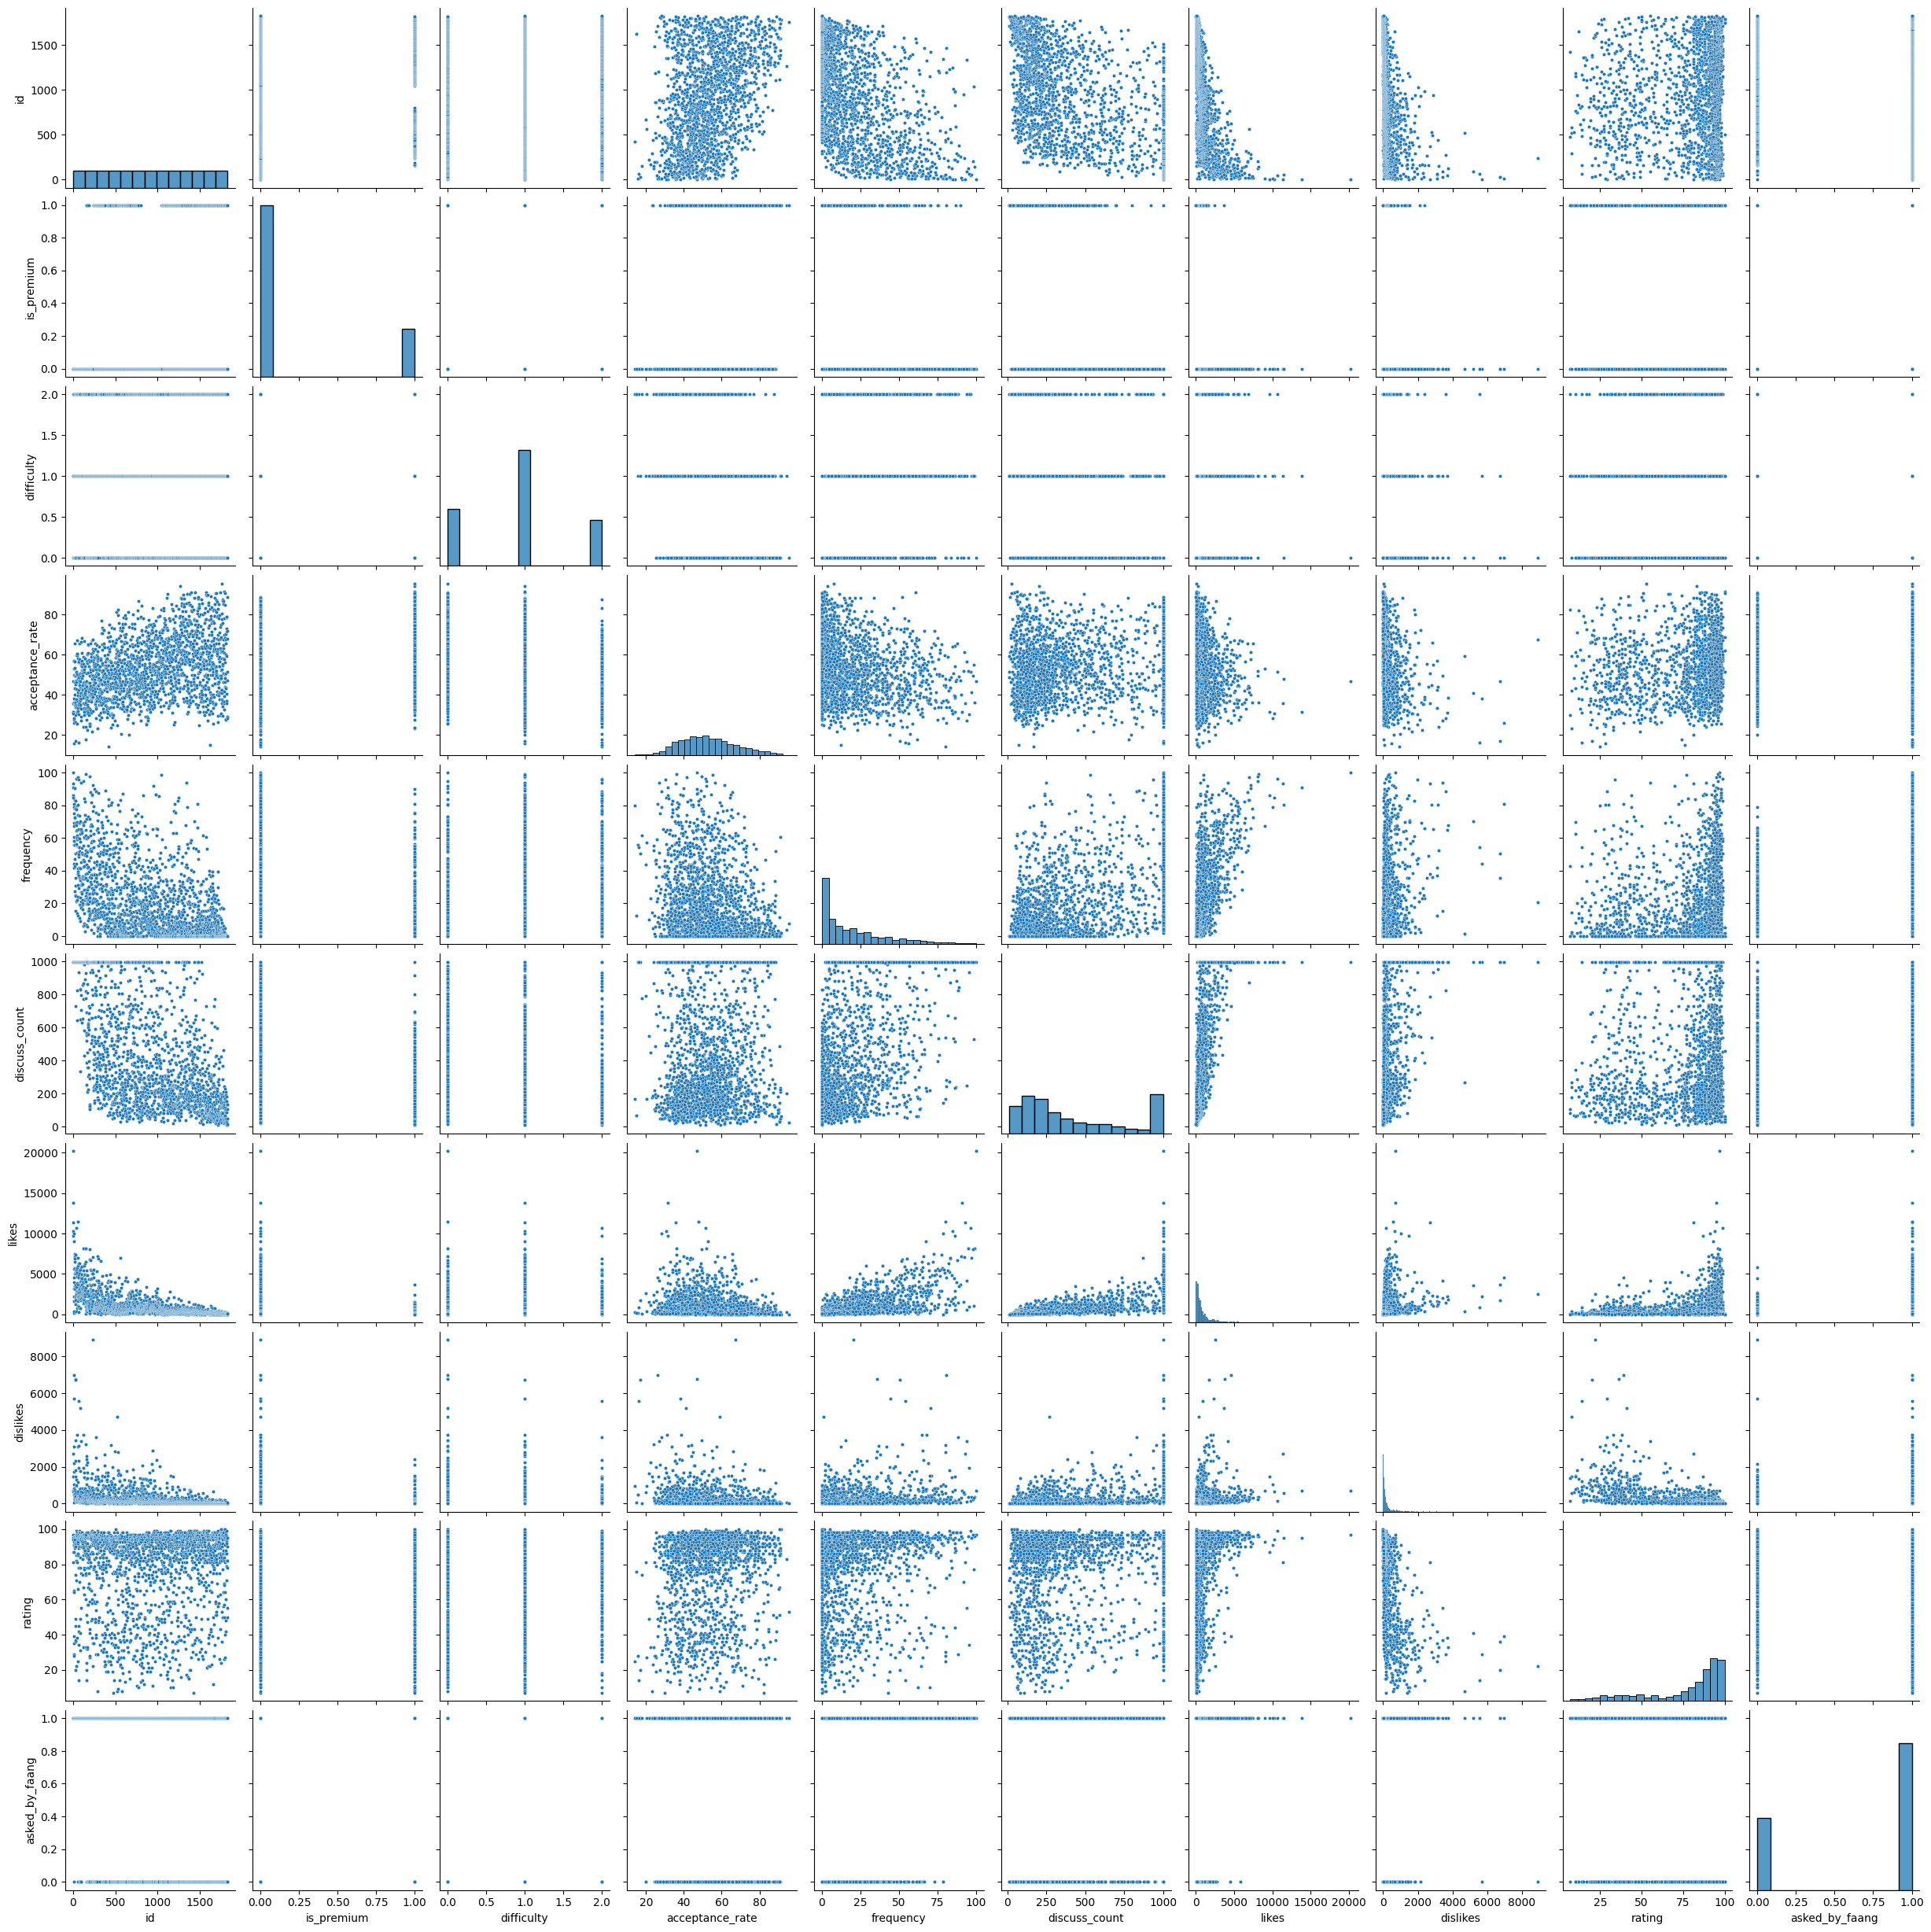

In [147]:
data_example = raw_data
difficulty_mapping = {'Easy': 0, 'Medium': 1, 'Hard': 2}
data_example['difficulty'] = data_example['difficulty'].replace(difficulty_mapping)
sns.pairplot(data_example, height=2.5, plot_kws={'s': 10});

### Count of Problems by Topic
In this section, we calculate and visualize the number of problems associated with each unique topic.


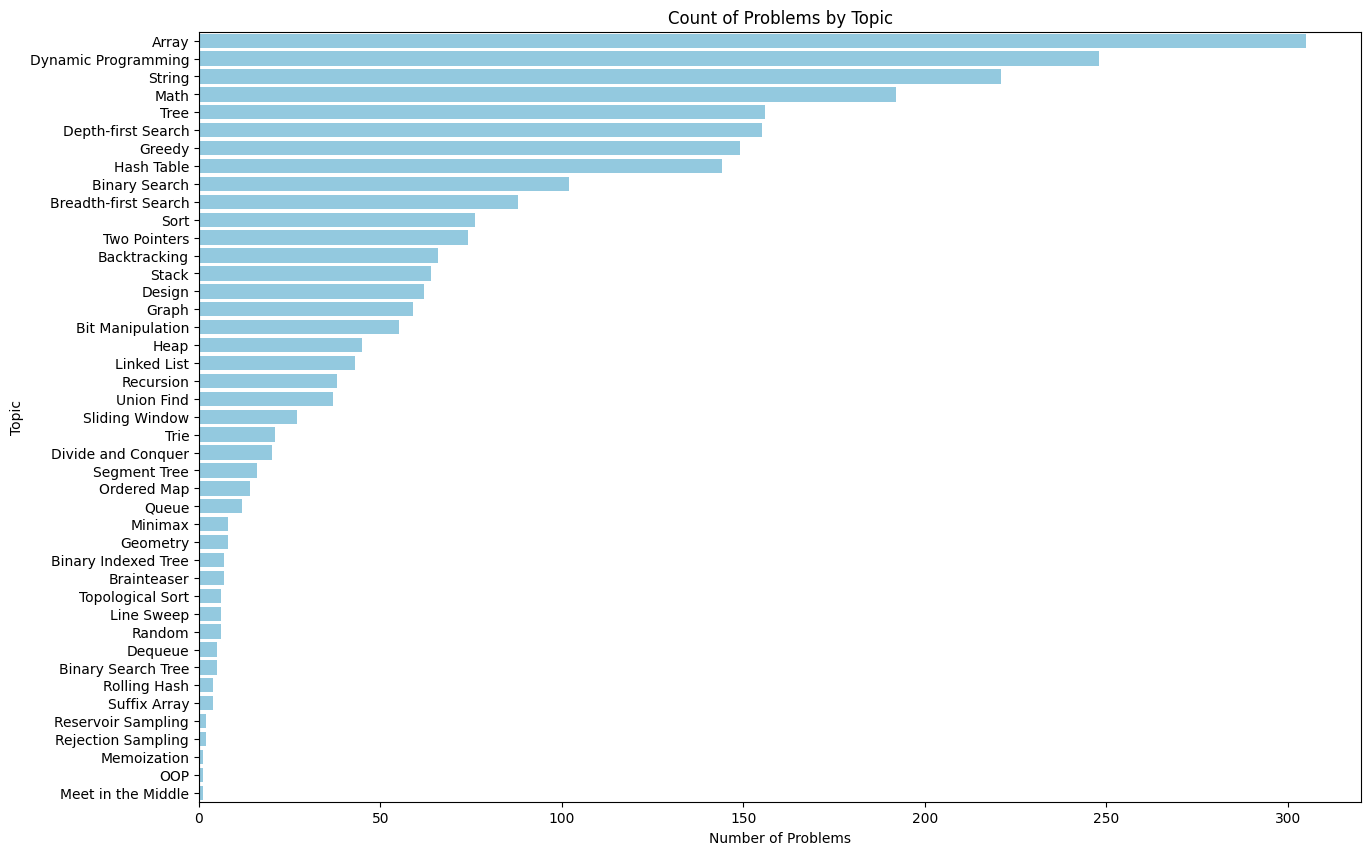

In [148]:
related_topics = data_example['related_topics'].str.get_dummies(sep=",").columns.to_list()
data_example = pd.concat([data_example.drop(columns=['related_topics']), data_example['related_topics'].str.get_dummies(sep=",")], axis=1)
unique_topics = [
    'Array', 'Backtracking', 'Binary Indexed Tree', 'Binary Search', 'Binary Search Tree',
    'Bit Manipulation', 'Brainteaser', 'Breadth-first Search', 'Depth-first Search', 'Dequeue',
    'Design', 'Divide and Conquer', 'Dynamic Programming', 'Geometry', 'Graph', 'Greedy', 'Hash Table',
    'Heap', 'Line Sweep', 'Linked List', 'Math', 'Meet in the Middle', 'Memoization', 'Minimax', 'OOP',
    'Ordered Map', 'Queue', 'Random', 'Recursion', 'Rejection Sampling', 'Reservoir Sampling', 'Rolling Hash',
    'Segment Tree', 'Sliding Window', 'Sort', 'Stack', 'String', 'Suffix Array', 'Topological Sort',
    'Tree', 'Trie', 'Two Pointers', 'Union Find'
]

topic_counts = data_example[unique_topics].sum().reset_index()
topic_counts.columns = ['Topic', 'Count']

topic_counts_sorted = topic_counts.sort_values(by='Count', ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x='Count', y='Topic', data=topic_counts_sorted, color='skyblue')

plt.title('Count of Problems by Topic')
plt.xlabel('Number of Problems')
plt.ylabel('Topic')
plt.show()

### Distribution of Problem Difficulty Levels
Next, we display the distribution of problems across different difficulty levels (Easy, Medium, Hard).

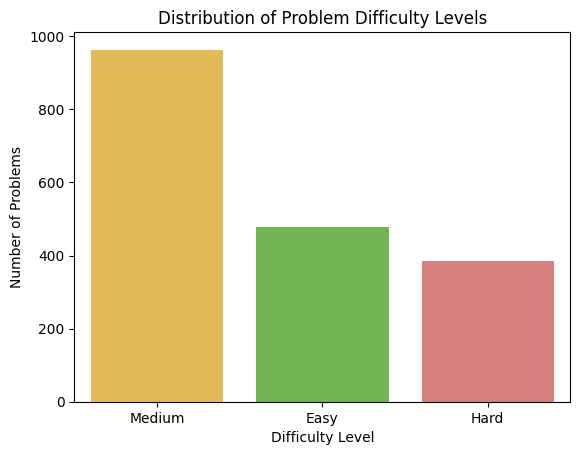

In [149]:
difficulty_distribution = data_example['difficulty'].value_counts()
difficulty_df = difficulty_distribution.reset_index()
difficulty_df.columns = ['Difficulty Level', 'Number of Problems']

difficulty_renames = {0: 'Easy', 1: 'Medium', 2: 'Hard'}
difficulty_df['Difficulty Level'] = difficulty_df['Difficulty Level'].replace(difficulty_renames)

custom_palette = {'Easy': '#6cc644', 'Medium': '#f9c440', 'Hard': '#e57373'}

sns.barplot(x='Difficulty Level', y='Number of Problems', data=difficulty_df, palette=custom_palette, hue='Difficulty Level', legend=False)
plt.title('Distribution of Problem Difficulty Levels')
plt.show()

### Distribution of Topics by Difficulty Level

Finally, we visualize how various topics are distributed across the three difficulty levels.

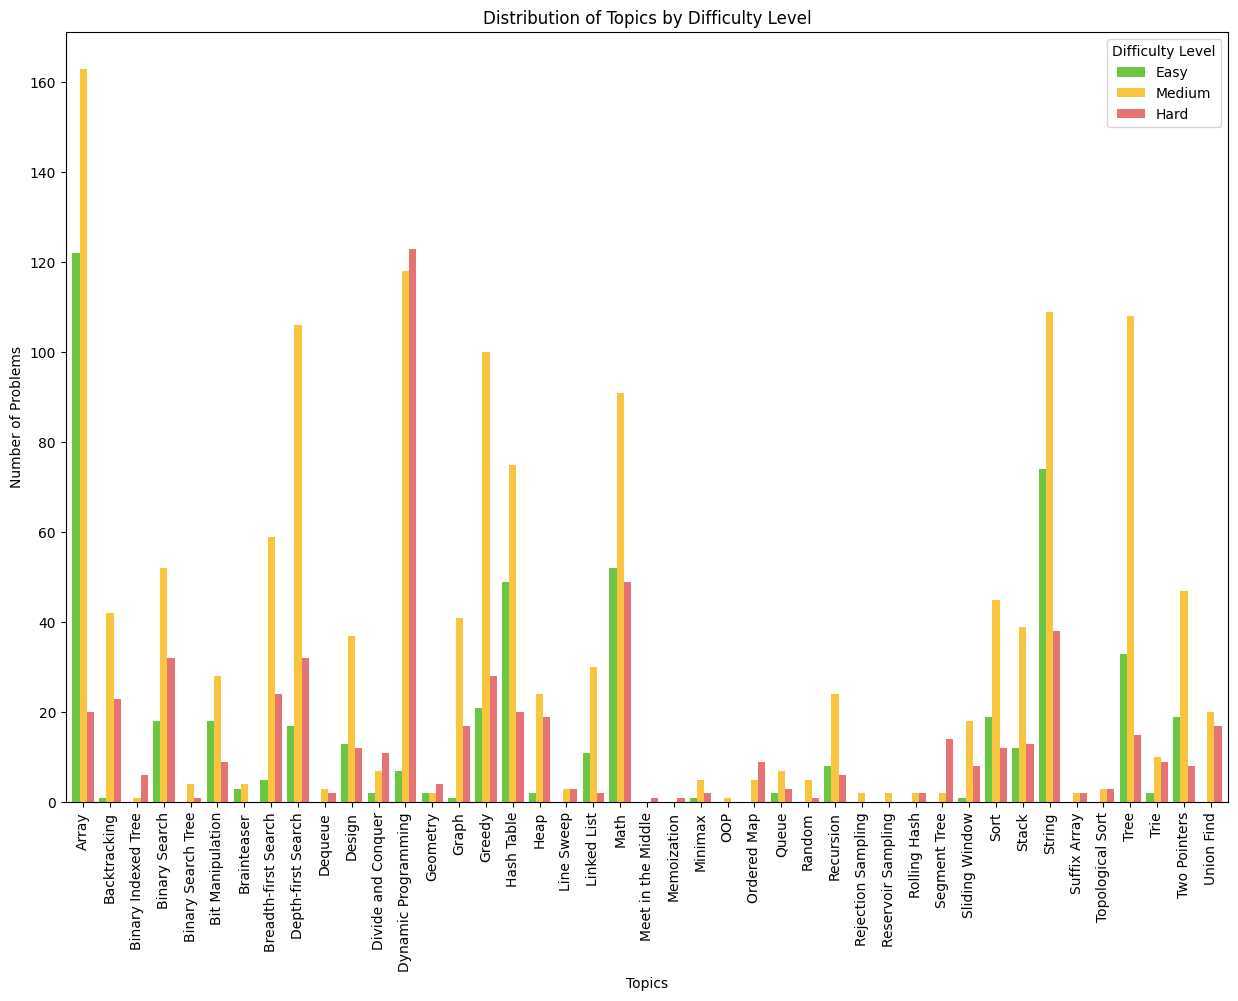

In [150]:
topic_by_difficulty = data_example.groupby('difficulty')[unique_topics].sum()
topic_by_difficulty = topic_by_difficulty.rename(index=difficulty_renames)

topic_by_difficulty.T.plot(kind='bar', figsize=(15, 10), width=0.8, color=['#6cc644', '#f9c440', '#e57373'])
plt.title('Distribution of Topics by Difficulty Level')
plt.ylabel('Number of Problems')
plt.xlabel('Topics')
plt.xticks(rotation=90)
plt.legend(title='Difficulty Level')
plt.show()

## Data Evaluation and How We Preprocessing Data

[link to README (which contains all content in this notebook)](./../README.md)

### Data we need to drop

Given our goal is to predict the "difficulty" by a series of inputs, through the above data exploration and data visualization above, we can eliminate the following columns from the database:

- "id": A unique identifier for each problem, which does not aid in predicting difficulty.
- "title": Same as above.
- "description": Same as above.
- "solution_link": Same as above.
- "url": Same as above.
- "similar_questions": Same as above.
- "asked_by_faang":  This attributes just indicates whether the question was asked by faang or not. We thought it would be more useful to have “how many faang companies asked this question” instead of that for the prediction.
- (standlization) "companies": Some big companies might choose harder problems, we would transfer this column to numeric attributes "fanng_count" and "non_fanng_count" that can be used by model.
- (standlization) "related_topics": There might be a correlation between this attribute and difficulty (topics associated with obscure concepts might be harder), since this is a String attributes, we need to standlization it.

### Data we need to standlization

We need to perform Data Transformation on the following attributes:

- "difficulty": This is our target attribute (class), given that it is initialized as "Easy", "Medium", "Hard", we need to perform Categorical Feature Encoding on it.
- "submissions": This attribute is number in string format,  we need to convert it into a number.
- "accepted": This attribute is number in string format,  we need to convert it into a number.
- "companies" standlized to "faang_count", As talked above, some big companies might choose harder problems, we would add a new column "faang" count how many famous companies ("Facebook", "Amazon", "Apple", "Netflix", "Google".) choosed this question.
- "companies" standlized to "non_faang_count", same as above, but this is how many compainess does not choose this question.
- "related topics": We will separate the terms in this attribute by comma, then one-hot encode them to fit the machine learning.

### Missing data and problems

Among the remaining attributes, we mainly have missing data in the following attributes:

- Currently, after dropping attributes, no attributes are left with missing data.

For the remaining attributes, we need to perform Normalization to make them more suitable for machine learning.


# Data Cleaning and Preprocessing
- Encode 'difficulty' as 0 (Easy), 1 (Medium), 2 (Hard).
- Encode 'related_topics' using one-hot encoding. Although it might not be relevant, it's interesting to explore.
- Ideally, make use of some NLP technique to transofrm 'description' into something usable.
- Drop 'id', 'title', 'description', 'solution_link', 'url', 'asked_by_faang' columns.
- Convert 'companies' into FAANG count/total count.

In [151]:
data = raw_data

# Encode the 'difficulty' column
data.loc[raw_data['difficulty'] == 'Easy', 'difficulty'] = 0
data.loc[raw_data['difficulty'] == 'Medium', 'difficulty'] = 1
data.loc[raw_data['difficulty'] == 'Hard', 'difficulty'] = 2
data['difficulty'] = pd.to_numeric(data.loc[:, 'difficulty'])

# Drop unwanted attributes
data.drop(columns=["id", "title", "description", "solution_link", "url", "asked_by_faang", "similar_questions"], inplace=True)

In [152]:
data.head()

is_premium  difficulty  acceptance_rate  frequency  discuss_count accepted  \
0           0           0             46.7      100.0            999     4.1M   
1           0           1             35.7       93.1            999     1.9M   
2           0           1             31.5       90.9            999     2.1M   
3           0           2             31.4       86.2            999   904.7K   
4           0           1             30.6       84.7            999     1.3M   

  submissions                                          companies  \
0        8.7M  Amazon,Google,Apple,Adobe,Microsoft,Bloomberg,...   
1        5.2M  Bloomberg,Microsoft,Amazon,Google,Facebook,App...   
2        6.7M  Amazon,Bloomberg,Microsoft,Facebook,Apple,Adob...   
3        2.9M  Amazon,Goldman Sachs,Facebook,Microsoft,Apple,...   
4        4.1M  Amazon,Microsoft,Wayfair,Facebook,Adobe,eBay,G...   

                                  related_topics  likes  dislikes  rating  
0                               Array,Hash Table  20217       712      97  
1                     Linked List,Math,Recursion  11350      2704      81  
2  Hash Table,Two Pointers,String,Sliding Window  13810       714      95  
3         Array,Binary Search,Divide and Conquer   9665      1486      87  
4                     String,Dynamic Programming  10271       670      94

In [153]:
# Reference sources used:
# - https://www.geeksforgeeks.org/python-pandas-series-str-count/
# - https://saturncloud.io/blog/how-to-check-if-pandas-column-has-value-from-list-of-strings/#:~:text=One%20simple%20and%20efficient%20way,contained%20in%20the%20given%20list
# - https://www.freecodecamp.org/news/dataframe-drop-column-in-pandas-how-to-remove-columns-from-dataframes/#:~:text=drop()%20Method%20in%20Pandas,the%20inplace%20parameter%20to%20True%20
import re

company_series = data["companies"]
fb_count = company_series.str.count("Facebook", re.I)
am_count = company_series.str.count("Amazon", re.I)
ap_count = company_series.str.count("Apple", re.I)
nf_count = company_series.str.count("Netflix", re.I)
gl_count = company_series.str.count("Google", re.I)

faang_count = fb_count + am_count + ap_count + nf_count + gl_count

total_company_count = company_series.str.count(",")
total_company_count = total_company_count + 1

non_faang_count = total_company_count - faang_count

data["faang_count"] = faang_count
data["non_faang_count"] = non_faang_count
data.drop(columns=["companies"], inplace=True)
data.head()

is_premium  difficulty  acceptance_rate  frequency  discuss_count accepted  \
0           0           0             46.7      100.0            999     4.1M   
1           0           1             35.7       93.1            999     1.9M   
2           0           1             31.5       90.9            999     2.1M   
3           0           2             31.4       86.2            999   904.7K   
4           0           1             30.6       84.7            999     1.3M   

  submissions                                 related_topics  likes  dislikes  \
0        8.7M                               Array,Hash Table  20217       712   
1        5.2M                     Linked List,Math,Recursion  11350      2704   
2        6.7M  Hash Table,Two Pointers,String,Sliding Window  13810       714   
3        2.9M         Array,Binary Search,Divide and Conquer   9665      1486   
4        4.1M                     String,Dynamic Programming  10271       670   

   rating  faang_count  non_faang_count  
0      97          4.0             16.0  
1      81          4.0              9.0  
2      95          4.0             16.0  
3      87          4.0              8.0  
4      94          3.0              8.0

In [154]:
data.head()

is_premium  difficulty  acceptance_rate  frequency  discuss_count accepted  \
0           0           0             46.7      100.0            999     4.1M   
1           0           1             35.7       93.1            999     1.9M   
2           0           1             31.5       90.9            999     2.1M   
3           0           2             31.4       86.2            999   904.7K   
4           0           1             30.6       84.7            999     1.3M   

  submissions                                 related_topics  likes  dislikes  \
0        8.7M                               Array,Hash Table  20217       712   
1        5.2M                     Linked List,Math,Recursion  11350      2704   
2        6.7M  Hash Table,Two Pointers,String,Sliding Window  13810       714   
3        2.9M         Array,Binary Search,Divide and Conquer   9665      1486   
4        4.1M                     String,Dynamic Programming  10271       670   

   rating  faang_count  non_faang_count  
0      97          4.0             16.0  
1      81          4.0              9.0  
2      95          4.0             16.0  
3      87          4.0              8.0  
4      94          3.0              8.0

In [155]:
# Convert the 'accepted' and 'submissions' columns to integer data types

def convert_to_int(s):
  if isinstance(s, (int, float)):
    return s
  elif pd.isna(s):
    return 0

  if 'K' in s:
    return float(s.replace('K', '')) * 1000
  elif 'M' in s:
    return float(s.replace('M', '')) * 1000000
  else:
    return s

data['accepted'] = data['accepted'].apply(convert_to_int)
data['submissions'] = data['submissions'].apply(convert_to_int)

related_topics = data['related_topics'].str.get_dummies(sep=",").columns.to_list()

# Use One-Hot Encoding for the 'related_topics' column
data = pd.concat([data.drop(columns=['related_topics']), data['related_topics'].str.get_dummies(sep=",")], axis=1)

In [156]:
data

is_premium  difficulty  acceptance_rate  frequency  discuss_count  \
0              0           0             46.7      100.0            999   
1              0           1             35.7       93.1            999   
2              0           1             31.5       90.9            999   
3              0           2             31.4       86.2            999   
4              0           1             30.6       84.7            999   
...          ...         ...              ...        ...            ...   
1820           1           0             88.9        0.0             15   
1821           0           0             67.8        0.0            104   
1822           0           1             71.8        0.0            135   
1823           0           1             47.2        0.0            134   
1824           0           2             28.1        0.0             48   

       accepted submissions  likes  dislikes  rating  ...  Sliding Window  \
0     4100000.0   8700000.0  20217       712      97  ...               0   
1     1900000.0   5200000.0  11350      2704      81  ...               0   
2     2100000.0   6700000.0  13810       714      95  ...               1   
3      904700.0   2900000.0   9665      1486      87  ...               0   
4     1300000.0   4100000.0  10271       670      94  ...               0   
...         ...         ...    ...       ...     ...  ...             ...   
1820        305         343      2         2      50  ...               0   
1821     7900.0     11700.0     37         4      90  ...               0   
1822     6800.0      9500.0     81         4      95  ...               0   
1823     5000.0     10700.0    147         8      95  ...               0   
1824     2100.0      7400.0     52        43      55  ...               0   

      Sort  Stack  String  Suffix Array  Topological Sort  Tree  Trie  \
0        0      0       0             0                 0     0     0   
1        0      0       0             0                 0     0     0   
2        0      0       1             0                 0     0     0   
3        0      0       0             0                 0     0     0   
4        0      0       1             0                 0     0     0   
...    ...    ...     ...           ...               ...   ...   ...   
1820     0      0       0             0                 0     0     0   
1821     0      0       0             0                 0     0     0   
1822     0      0       0             0                 0     0     0   
1823     0      0       0             0                 0     0     0   
1824     0      0       0             0                 0     0     0   

      Two Pointers  Union Find  
0                0           0  
1                0           0  
2                1           0  
3                0           0  
4                0           0  
...            ...         ...  
1820             0           0  
1821             0           0  
1822             0           0  
1823             0           0  
1824             0           0  

[1825 rows x 55 columns]

# Data Exploration
- Analyze the distribution of topics and difficulty levels, and the relationship between the two.
- Explore the correlation between problem difficulty and other factors such as acceptence rate, frequency, submissions, related topics, and the like-to-dislike ratio.
- Visualize the data to explore patterns and uncover insights.

In [157]:
data.describe()

is_premium   difficulty  acceptance_rate    frequency  discuss_count  \
count  1825.000000  1825.000000      1825.000000  1825.000000    1825.000000   
mean      0.218082     0.949589        53.139616    21.113041     421.435068   
std       0.413057     0.685598        14.778411    22.364741     330.583617   
min       0.000000     0.000000        13.900000     0.000000       9.000000   
25%       0.000000     0.000000        42.400000     3.100000     150.000000   
50%       0.000000     1.000000        51.600000    13.500000     292.000000   
75%       0.000000     1.000000        62.800000    31.800000     663.000000   
max       1.000000     2.000000        95.600000   100.000000     999.000000   

              likes     dislikes       rating  faang_count  non_faang_count  \
count   1825.000000  1825.000000  1825.000000  1749.000000      1749.000000   
mean    1050.534795   279.010959    77.391233     1.068039         1.250429   
std     1512.674013   608.489206    23.317515     1.011067         2.060625   
min        2.000000     0.000000     7.000000     0.000000         0.000000   
25%      217.000000    32.000000    67.000000     0.000000         0.000000   
50%      516.000000    92.000000    88.000000     1.000000         1.000000   
75%     1200.000000   239.000000    95.000000     1.000000         1.000000   
max    20217.000000  8900.000000   100.000000     4.000000        16.000000   

       ...  Sliding Window         Sort        Stack       String  \
count  ...     1825.000000  1825.000000  1825.000000  1825.000000   
mean   ...        0.014795     0.041644     0.035068     0.121096   
std    ...        0.120763     0.199829     0.184003     0.326328   
min    ...        0.000000     0.000000     0.000000     0.000000   
25%    ...        0.000000     0.000000     0.000000     0.000000   
50%    ...        0.000000     0.000000     0.000000     0.000000   
75%    ...        0.000000     0.000000     0.000000     0.000000   
max    ...        1.000000     1.000000     1.000000     1.000000   

       Suffix Array  Topological Sort         Tree         Trie  Two Pointers  \
count   1825.000000       1825.000000  1825.000000  1825.000000   1825.000000   
mean       0.002192          0.003288     0.085479     0.011507      0.040548   
std        0.046778          0.057260     0.279670     0.106680      0.197295   
min        0.000000          0.000000     0.000000     0.000000      0.000000   
25%        0.000000          0.000000     0.000000     0.000000      0.000000   
50%        0.000000          0.000000     0.000000     0.000000      0.000000   
75%        0.000000          0.000000     0.000000     0.000000      0.000000   
max        1.000000          1.000000     1.000000     1.000000      1.000000   

        Union Find  
count  1825.000000  
mean      0.020274  
std       0.140975  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 53 columns]

## Pairplot
Now, we visualize the pairwise relationships between variables to identify potential patterns and correlations.

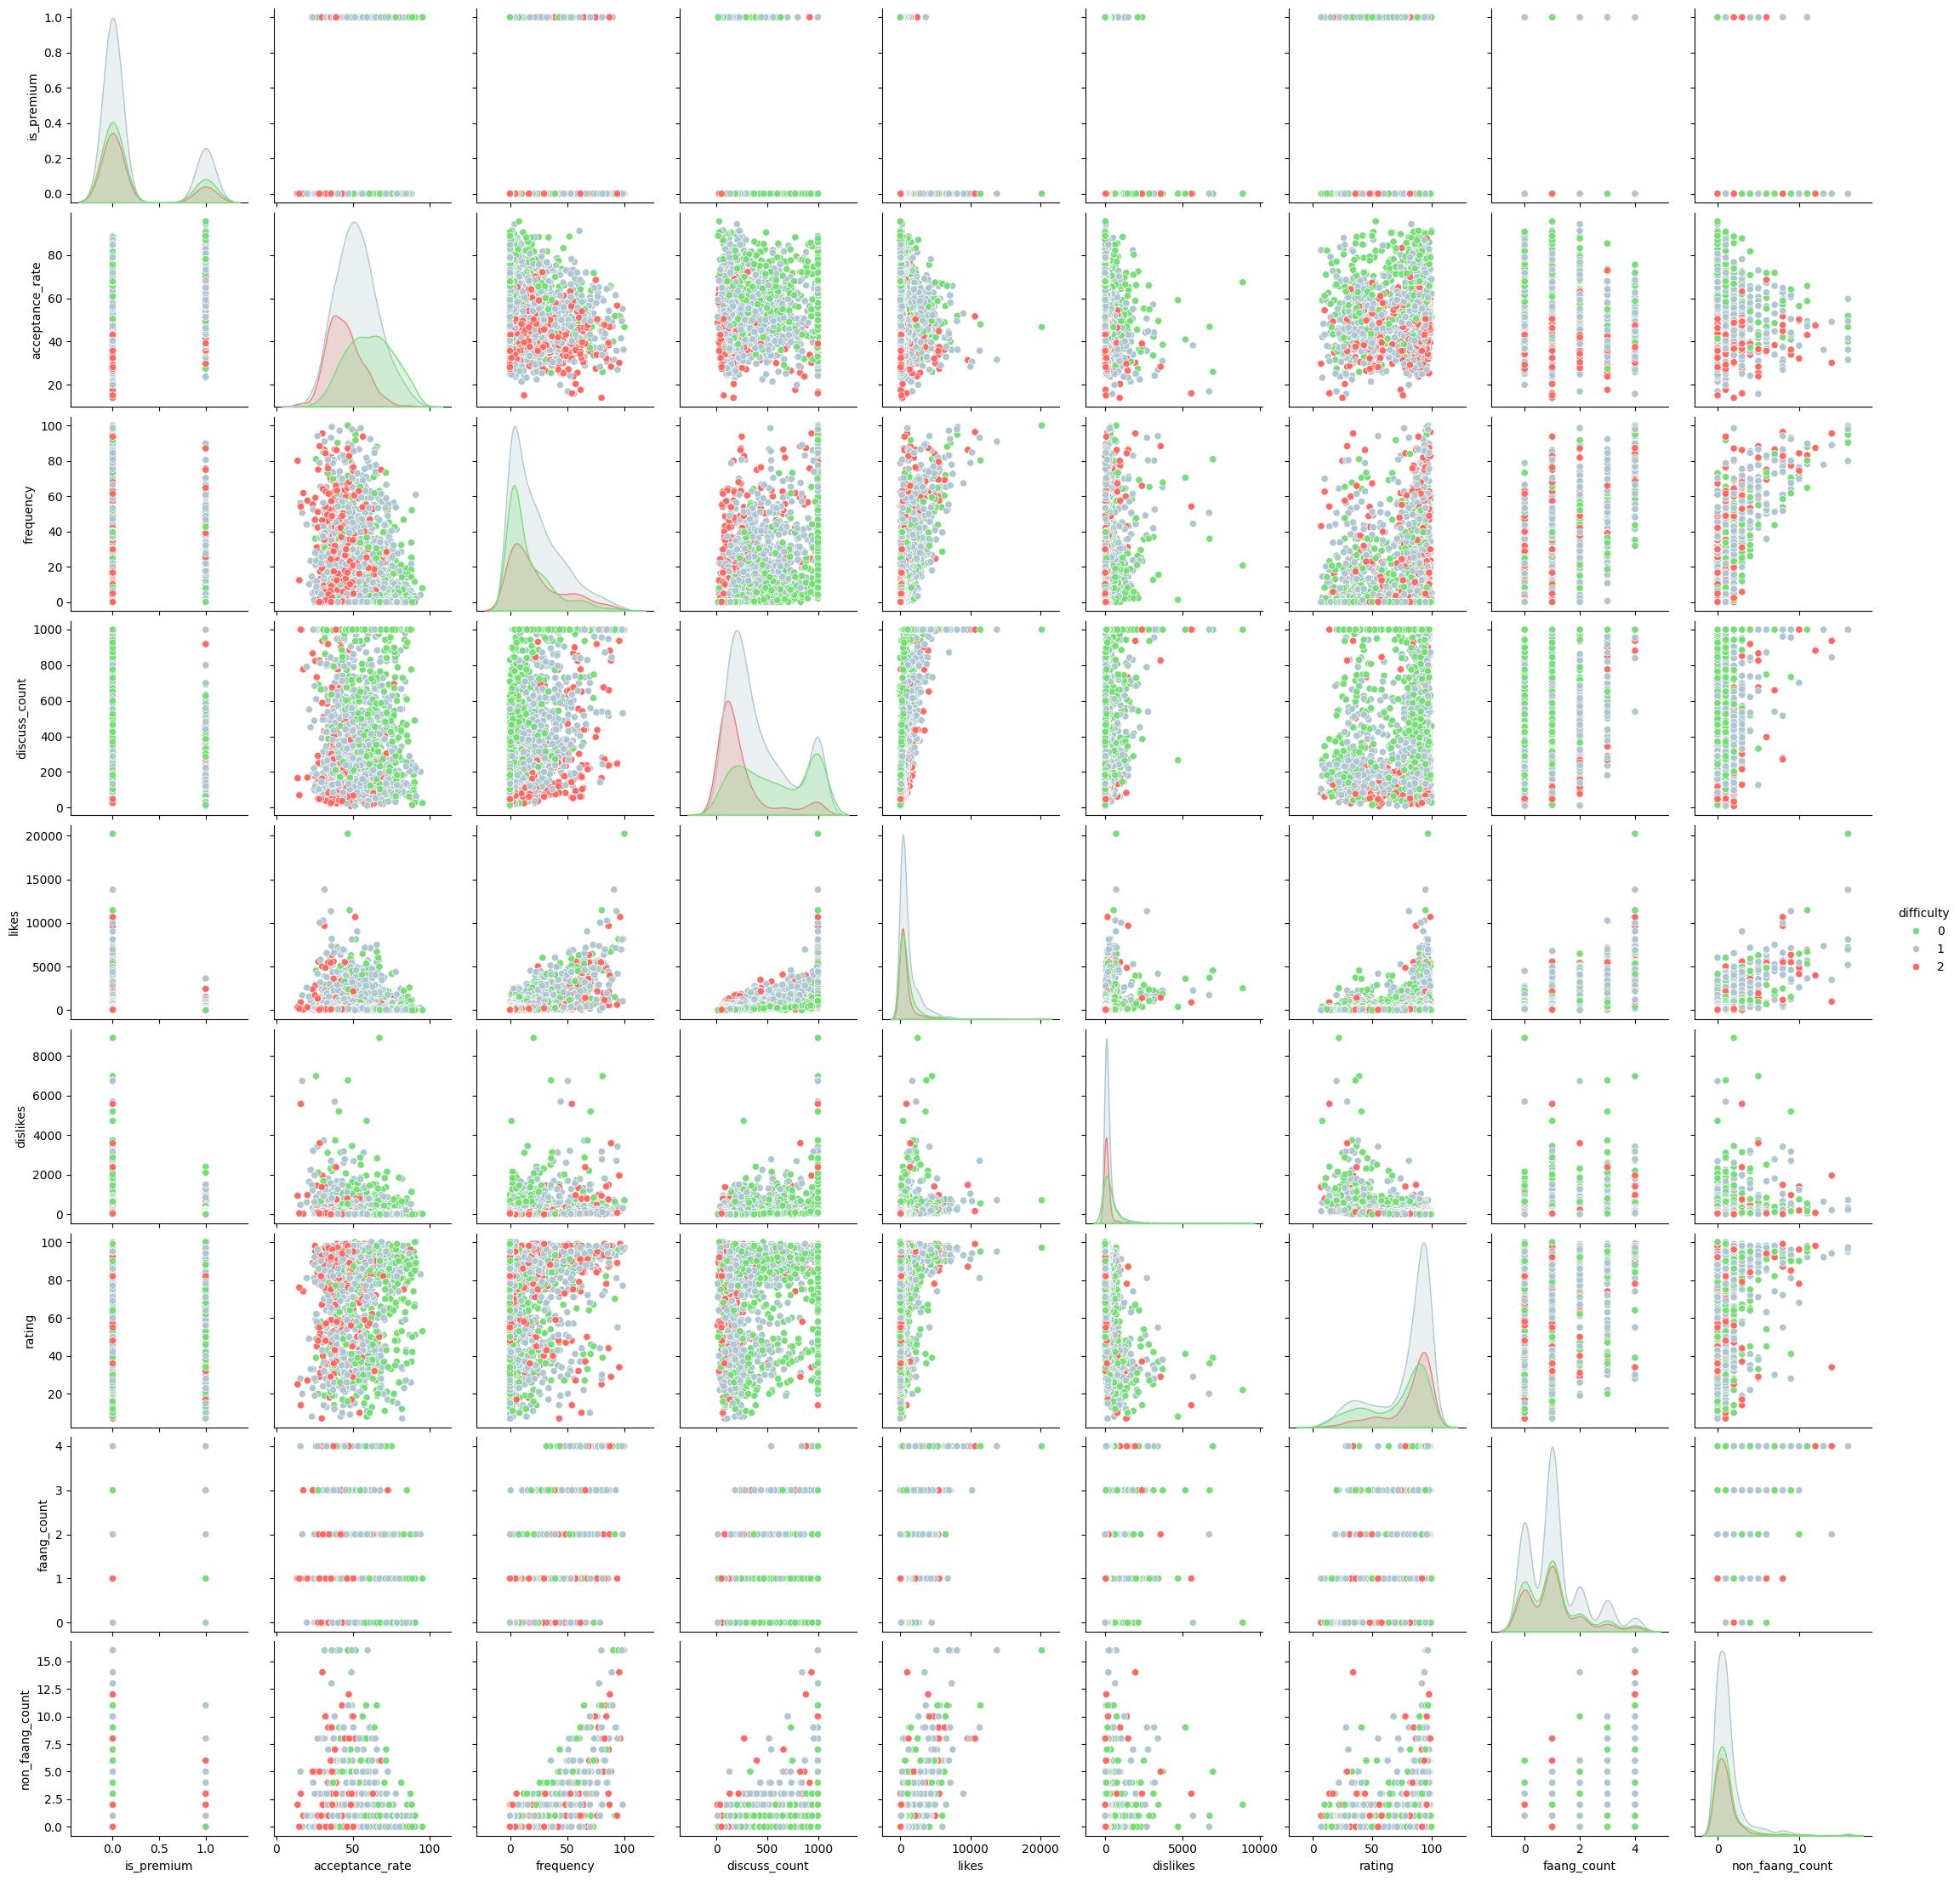

In [158]:
# We have opted to exclude the one-hot encoded data, as including it significantly increases loading times.
palette = ['#77dd77', '#aec6cf', '#ff6961']
sns.pairplot(data.drop(related_topics, axis=1), hue='difficulty', palette=palette);

Key observations from our pair plot analysis:
- There appears to be a significant correlation between discussion, acceptance rate, and difficulty.
- Likes and dislikes are inversely correlated.
- The count of non-FAANG companies and problem frequency seem to have a positive correlation.

However, the pair plot does not provide provide substantial information relevant to our goal. Therefore, we will proceed to examine the data using a heatmap/correlation matrix to gain more insights.

## Correlation Matrix
Transitioning to the correlation matrix analysis, our aim is to gain deeper insights into the relationships between variables. We begin by normalizing our data, for which we have chosen min-max normalization since not all our data is normally distributed.

In [159]:
normalized_data = data

def minMaxNormalizeSeries(series):
  if series.dtype != object:
    min = series.min()
    max = series.max()
    series = (series-min)/(max-min)
  return series

normalized_data.apply(minMaxNormalizeSeries, axis = 0)

is_premium  difficulty  acceptance_rate  frequency  discuss_count  \
0            0.0         0.0         0.401469      1.000       1.000000   
1            0.0         0.5         0.266830      0.931       1.000000   
2            0.0         0.5         0.215422      0.909       1.000000   
3            0.0         1.0         0.214198      0.862       1.000000   
4            0.0         0.5         0.204406      0.847       1.000000   
...          ...         ...              ...        ...            ...   
1820         1.0         0.0         0.917993      0.000       0.006061   
1821         0.0         0.0         0.659731      0.000       0.095960   
1822         0.0         0.5         0.708690      0.000       0.127273   
1823         0.0         0.5         0.407589      0.000       0.126263   
1824         0.0         1.0         0.173807      0.000       0.039394   

       accepted submissions     likes  dislikes    rating  ...  \
0     4100000.0   8700000.0  1.000000  0.080000  0.967742  ...   
1     1900000.0   5200000.0  0.561365  0.303820  0.795699  ...   
2     2100000.0   6700000.0  0.683057  0.080225  0.946237  ...   
3      904700.0   2900000.0  0.478011  0.166966  0.860215  ...   
4     1300000.0   4100000.0  0.507989  0.075281  0.935484  ...   
...         ...         ...       ...       ...       ...  ...   
1820        305         343  0.000000  0.000225  0.462366  ...   
1821     7900.0     11700.0  0.001731  0.000449  0.892473  ...   
1822     6800.0      9500.0  0.003908  0.000449  0.946237  ...   
1823     5000.0     10700.0  0.007173  0.000899  0.946237  ...   
1824     2100.0      7400.0  0.002473  0.004831  0.516129  ...   

      Sliding Window  Sort  Stack  String  Suffix Array  Topological Sort  \
0                0.0   0.0    0.0     0.0           0.0               0.0   
1                0.0   0.0    0.0     0.0           0.0               0.0   
2                1.0   0.0    0.0     1.0           0.0               0.0   
3                0.0   0.0    0.0     0.0           0.0               0.0   
4                0.0   0.0    0.0     1.0           0.0               0.0   
...              ...   ...    ...     ...           ...               ...   
1820             0.0   0.0    0.0     0.0           0.0               0.0   
1821             0.0   0.0    0.0     0.0           0.0               0.0   
1822             0.0   0.0    0.0     0.0           0.0               0.0   
1823             0.0   0.0    0.0     0.0           0.0               0.0   
1824             0.0   0.0    0.0     0.0           0.0               0.0   

      Tree  Trie  Two Pointers  Union Find  
0      0.0   0.0           0.0         0.0  
1      0.0   0.0           0.0         0.0  
2      0.0   0.0           1.0         0.0  
3      0.0   0.0           0.0         0.0  
4      0.0   0.0           0.0         0.0  
...    ...   ...           ...         ...  
1820   0.0   0.0           0.0         0.0  
1821   0.0   0.0           0.0         0.0  
1822   0.0   0.0           0.0         0.0  
1823   0.0   0.0           0.0         0.0  
1824   0.0   0.0           0.0         0.0  

[1825 rows x 55 columns]

With the data normalization complete, we can now examine our correlation matrix.

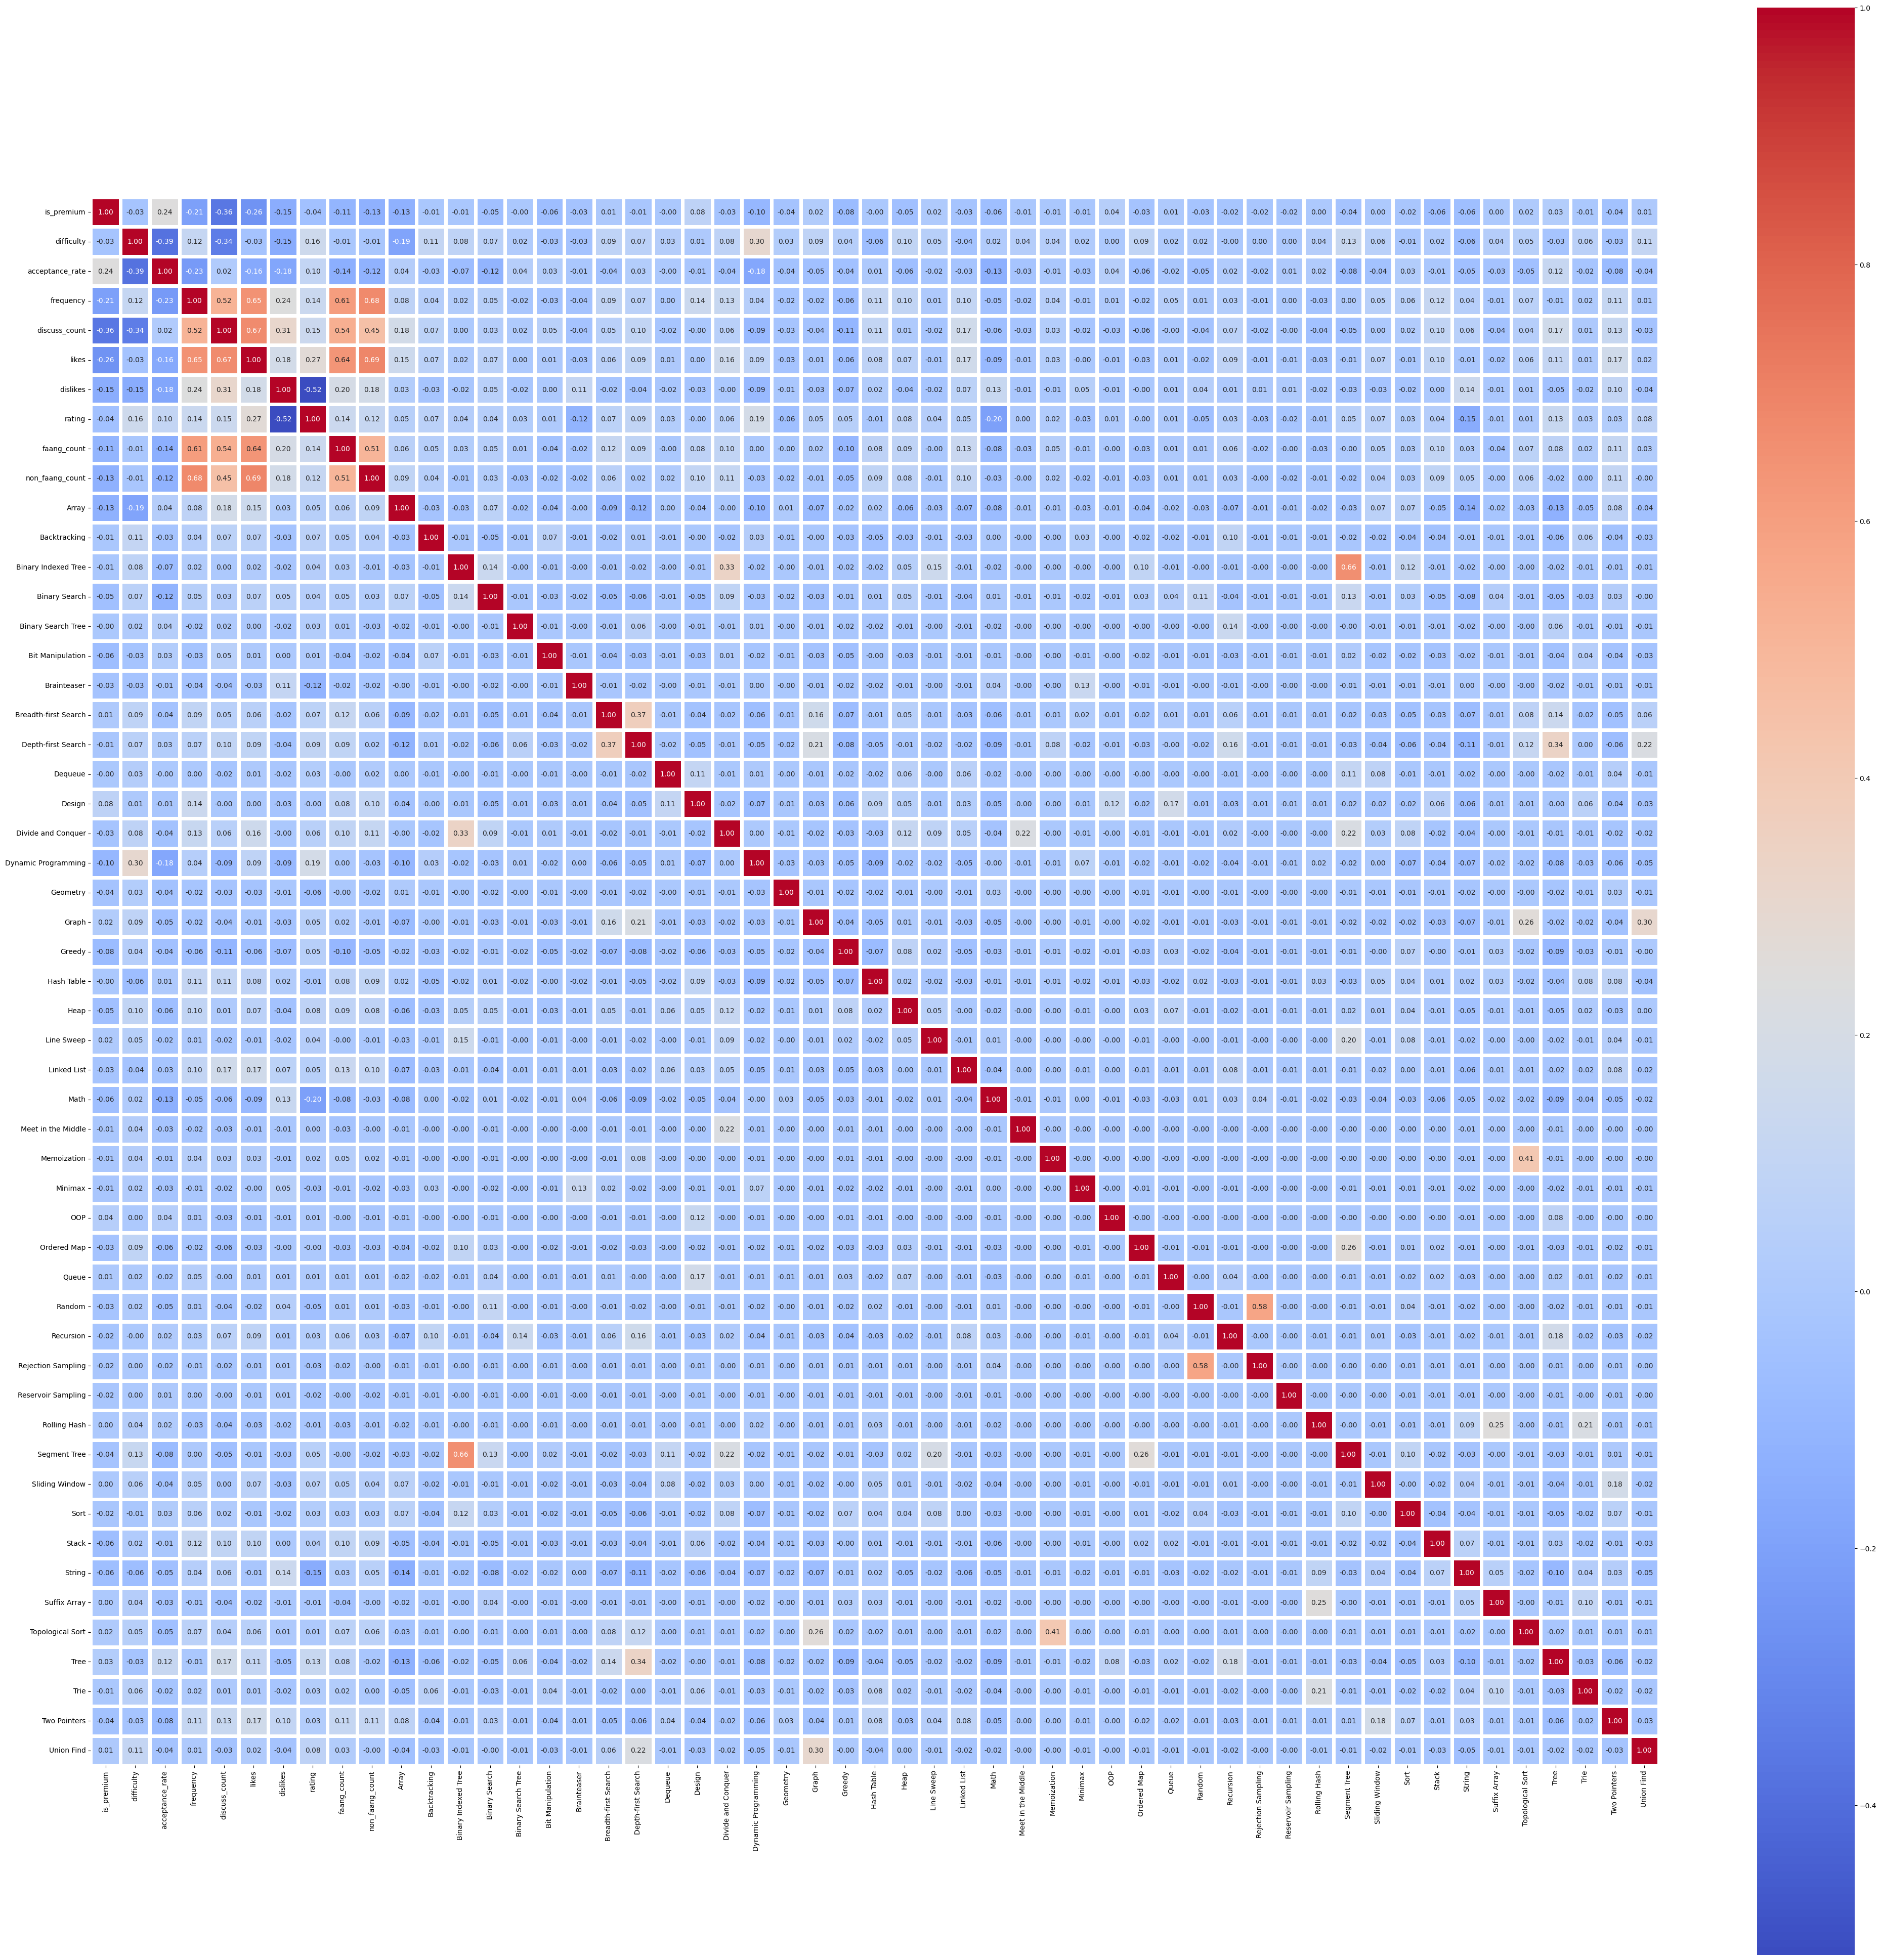

In [160]:
dataplot = normalized_data

plt.figure(figsize=(50, 50))
sns.heatmap(dataplot.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=5)
plt.show()

This correlation matrix offers insights into the relationships between variables. Notable observations include:
- Several "Tree" related topics have a positive correlation with eachother.
- Discussion is negatively correlated with rating (significantly more so than submissions), implying that the harder a problem is, the less discussion there will be.
- The most negatively correlated topic with rating is "Math"

However, given the extensive information presented in this correlation matrix, we will narrow our focus on the parameter of interest: problem difficulty.

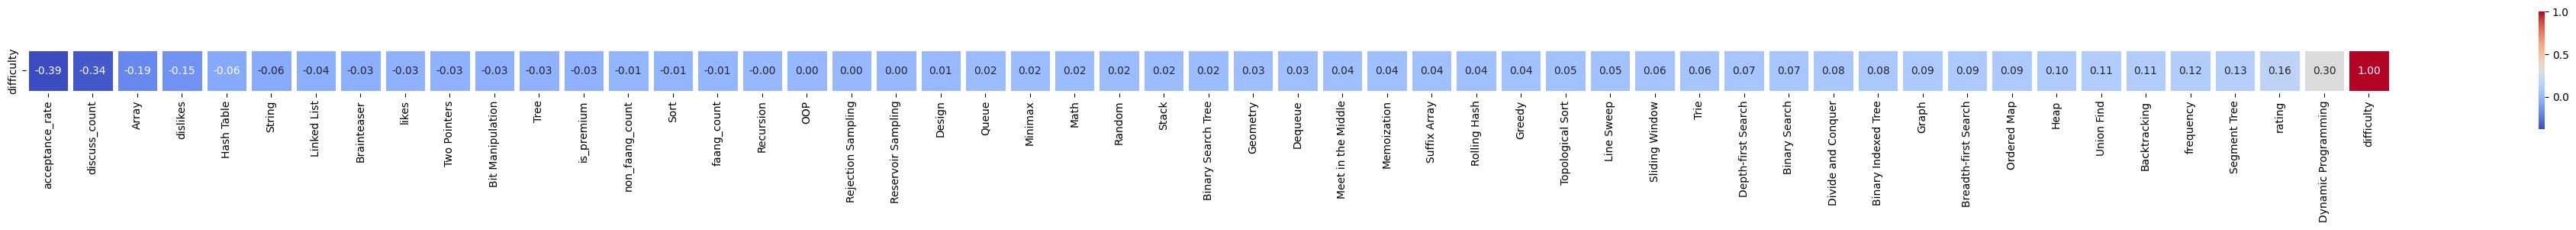

In [161]:
# Look at all the correlation between subjects and difficulty and rank them
difficulty_vs_all = pd.DataFrame(normalized_data.corr(numeric_only=True).loc[['difficulty'], :]).sort_values(by=['difficulty'], axis = 1)

plt.figure(figsize=(50, 2))
sns.heatmap(difficulty_vs_all, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=5);

To clarify the complex data, we break down the analysis into related topics and the other remaining features:

In [162]:
difficulty_vs_related_topics = difficulty_vs_all.loc[:, related_topics].sort_values(by=['difficulty'], axis = 1)
difficulty_vs_other = difficulty_vs_all.drop(related_topics, axis=1).sort_values(by=['difficulty'], axis = 1)

Looking at the related topics we can conclude some interesting properties:
- "Dynamic programming" is the most corrolated topic in determining problem difficulty.
- "Array" topics are the most negatively correlated topic.
- Most topic labels are associated with increased difficulty.

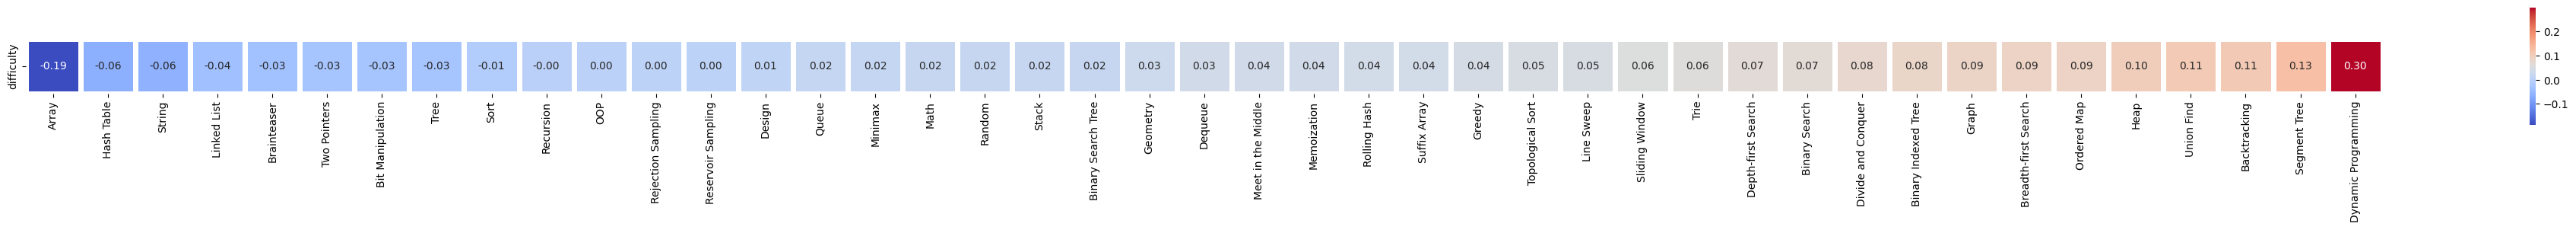

In [163]:
plt.figure(figsize=(50, 2))
sns.heatmap(difficulty_vs_related_topics, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=5);

Looking at the other features we can conclude some other interesting properties:
- "Acceptance rate" is the most correlated feature determining difficulty (which seems self evident)
- "Discuss count" is the second most correlated feature.
- "Dislikes" seems to be a better predictor of problem difficulty than likes (which is interesting since leetcode actually hid the dislike counter)

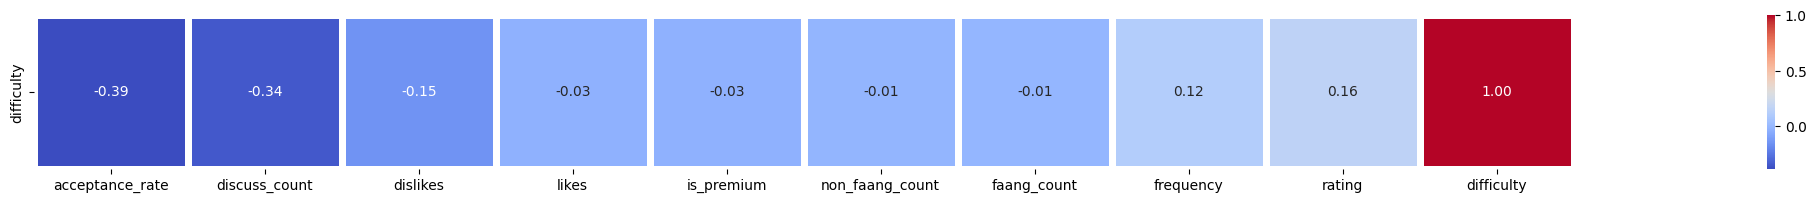

In [164]:
plt.figure(figsize=(50, 2))
sns.heatmap(difficulty_vs_other, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=5);

We can now clearly decide which features are relevant to problem difficulty and which are not. We will drop all features with a correlation coefficient below 0.05, leaving us with a set of 24 features (excluding 'difficulty' itself).

23

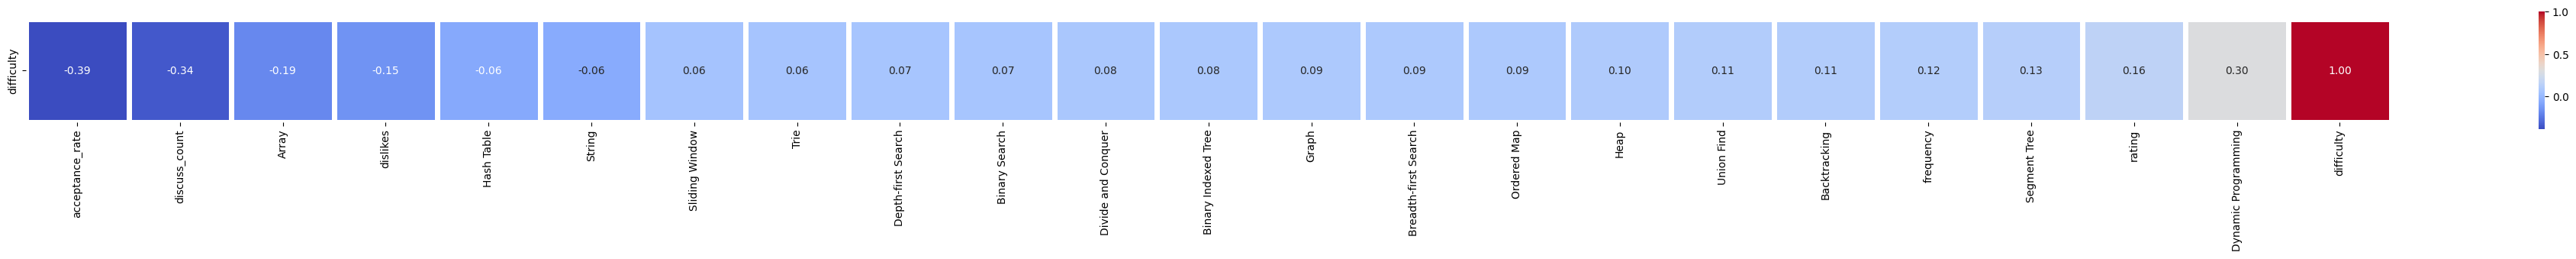

In [165]:
# Drop values with a magnitude below .05
relevant_feature_corr = difficulty_vs_all.loc[:, (abs(difficulty_vs_all) >= .05).T.difficulty]
plt.figure(figsize=(50, 2))
sns.heatmap(relevant_feature_corr.sort_values(by=['difficulty'], axis = 1), annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=5);
len(relevant_feature_corr.columns)

# Data Preprocessing
Following our comprehensive data exploration, we have know identified a select group of features to keep.
Although, a significant portion our data underwent preprocessing during the initial importing and cleaning phase, now we just need to make refinements based on our findings from the data exploration.

In [166]:
relevant_feature_corr.columns

Index(['acceptance_rate', 'discuss_count', 'Array', 'dislikes', 'Hash Table',
       'String', 'Sliding Window', 'Trie', 'Depth-first Search',
       'Binary Search', 'Divide and Conquer', 'Binary Indexed Tree', 'Graph',
       'Breadth-first Search', 'Ordered Map', 'Heap', 'Union Find',
       'Backtracking', 'frequency', 'Segment Tree', 'rating',
       'Dynamic Programming', 'difficulty'],
      dtype='object')

In [167]:
data

is_premium  difficulty  acceptance_rate  frequency  discuss_count  \
0              0           0             46.7      100.0            999   
1              0           1             35.7       93.1            999   
2              0           1             31.5       90.9            999   
3              0           2             31.4       86.2            999   
4              0           1             30.6       84.7            999   
...          ...         ...              ...        ...            ...   
1820           1           0             88.9        0.0             15   
1821           0           0             67.8        0.0            104   
1822           0           1             71.8        0.0            135   
1823           0           1             47.2        0.0            134   
1824           0           2             28.1        0.0             48   

       accepted submissions  likes  dislikes  rating  ...  Sliding Window  \
0     4100000.0   8700000.0  20217       712      97  ...               0   
1     1900000.0   5200000.0  11350      2704      81  ...               0   
2     2100000.0   6700000.0  13810       714      95  ...               1   
3      904700.0   2900000.0   9665      1486      87  ...               0   
4     1300000.0   4100000.0  10271       670      94  ...               0   
...         ...         ...    ...       ...     ...  ...             ...   
1820        305         343      2         2      50  ...               0   
1821     7900.0     11700.0     37         4      90  ...               0   
1822     6800.0      9500.0     81         4      95  ...               0   
1823     5000.0     10700.0    147         8      95  ...               0   
1824     2100.0      7400.0     52        43      55  ...               0   

      Sort  Stack  String  Suffix Array  Topological Sort  Tree  Trie  \
0        0      0       0             0                 0     0     0   
1        0      0       0             0                 0     0     0   
2        0      0       1             0                 0     0     0   
3        0      0       0             0                 0     0     0   
4        0      0       1             0                 0     0     0   
...    ...    ...     ...           ...               ...   ...   ...   
1820     0      0       0             0                 0     0     0   
1821     0      0       0             0                 0     0     0   
1822     0      0       0             0                 0     0     0   
1823     0      0       0             0                 0     0     0   
1824     0      0       0             0                 0     0     0   

      Two Pointers  Union Find  
0                0           0  
1                0           0  
2                1           0  
3                0           0  
4                0           0  
...            ...         ...  
1820             0           0  
1821             0           0  
1822             0           0  
1823             0           0  
1824             0           0  

[1825 rows x 55 columns]

In [168]:
final_data = data.loc[:, relevant_feature_corr.columns]
final_data

acceptance_rate  discuss_count  Array  dislikes  Hash Table  String  \
0                46.7            999      1       712           1       0   
1                35.7            999      0      2704           0       0   
2                31.5            999      0       714           1       1   
3                31.4            999      1      1486           0       0   
4                30.6            999      0       670           0       1   
...               ...            ...    ...       ...         ...     ...   
1820             88.9             15      0         2           0       0   
1821             67.8            104      0         4           0       0   
1822             71.8            135      1         4           0       0   
1823             47.2            134      0         8           0       0   
1824             28.1             48      0        43           0       0   

      Sliding Window  Trie  Depth-first Search  Binary Search  ...  \
0                  0     0                   0              0  ...   
1                  0     0                   0              0  ...   
2                  1     0                   0              0  ...   
3                  0     0                   0              1  ...   
4                  0     0                   0              0  ...   
...              ...   ...                 ...            ...  ...   
1820               0     0                   0              0  ...   
1821               0     0                   0              0  ...   
1822               0     0                   0              0  ...   
1823               0     0                   0              0  ...   
1824               0     0                   0              0  ...   

      Breadth-first Search  Ordered Map  Heap  Union Find  Backtracking  \
0                        0            0     0           0             0   
1                        0            0     0           0             0   
2                        0            0     0           0             0   
3                        0            0     0           0             0   
4                        0            0     0           0             0   
...                    ...          ...   ...         ...           ...   
1820                     0            0     0           0             0   
1821                     0            0     0           0             0   
1822                     0            0     0           0             0   
1823                     1            0     0           0             0   
1824                     0            0     1           0             0   

      frequency  Segment Tree  rating  Dynamic Programming  difficulty  
0         100.0             0      97                    0           0  
1          93.1             0      81                    0           1  
2          90.9             0      95                    0           1  
3          86.2             0      87                    0           2  
4          84.7             0      94                    1           1  
...         ...           ...     ...                  ...         ...  
1820        0.0             0      50                    0           0  
1821        0.0             0      90                    0           0  
1822        0.0             0      95                    0           1  
1823        0.0             0      95                    1           1  
1824        0.0             0      55                    0           2  

[1825 rows x 23 columns]

# Model #1: K-Nearest Neighbors

We chose the K-Nearest Neighbors (KNN) algorithm for its simplicity and effectiveness, particularly in multi-label classification tasks. KNN operates on the principle that similar data points are often in close proximity and classifies a new data point based on the majority vote of its 'k' nearest neighbors. Its ability to handle multi-label classification makes it well-suited for predicting the difficulty levels of LeetCode problems (Easy, Medium, Hard).


## Training the K-Nearest Neighbors Model

In [169]:
# Reference for methodology: https://towardsdatascience.com/multiclass-classification-using-k-nearest-neighbours-ca5281a9ef76

x_data = final_data.drop(['difficulty'], axis=1) # Use all other available columns in our preprocessed dataset for our feature set
y_data = final_data['difficulty'] # The 'difficulty' column is what we are predicting

# Splitting the dataset into training and testing sets to evaluate the model
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=151) #split the data into training and testing

# Defining a range of 'k' values to find the optimal number of neighbors
k_range = range(1, 40)
k_cross_scores = []
k_scores_train = []
k_scores_test = []

# Iterating over k values to identify the one with the highest accuracy
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k) #create the classifier

    # Use cross-validation to find the best k value
    train_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_cross_scores.append(1 - train_scores.mean())  # error = 1 - accuracy

    # Training the model and making predictions to evaluate performance.
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    # Calculating and storing the error rates for training and testing predictions
    train_accuracy = accuracy_score(y_train, y_pred_train)
    k_scores_train.append(1 - train_accuracy)

    test_accuracy = accuracy_score(y_test, y_pred_test)
    k_scores_test.append(1 - test_accuracy)


In [170]:
# Finding the k value that minimizes cross-validation error
best_k = k_range[np.argmin(k_cross_scores)]

print("The best k value is: ", best_k)

# Training the model with the best k value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

The best k value is:  12


KNeighborsClassifier(n_neighbors=12)

## Evulation on the Test Set (KNN)

After tuning our model to the best 'k' value, we continue by assessing its performance on the unseen test data to see how well it generalizes.

In [171]:
# Predicting on the testing set with the optimized KNN model
ypred_test = knn_best.predict(X_test)

# Getting insights on the model's performance on the testing set
cm_test = multilabel_confusion_matrix(y_test, ypred_test)
print("Confusion Matrix:\n")
print(cm_test)

cr_test = classification_report(y_test, ypred_test)
print("\n\nClassification Report:\n")
print(cr_test)

Confusion Matrix:

[[[118  17]
  [ 32  16]]

 [[ 39  49]
  [ 21  74]]

 [[134   9]
  [ 22  18]]]


Classification Report:

              precision    recall  f1-score   support

           0       0.48      0.33      0.40        48
           1       0.60      0.78      0.68        95
           2       0.67      0.45      0.54        40

    accuracy                           0.59       183
   macro avg       0.58      0.52      0.54       183
weighted avg       0.59      0.59      0.57       183



## Evulation on the Training Set (KNN)

To understand our model's learning, we also evaluate its performance on the training set to see how well it has captured the underlying patterns of the data.

In [172]:
# Predicting on the training set
ypred_train = knn_best.predict(X_train)

# Getting insights on the model's performance on the training set
cm_train = multilabel_confusion_matrix(y_train, ypred_train)
print("Confusion Matrix:\n")
print(cm_train)

cr_train = classification_report(y_train, ypred_train)
print("\n\nClassification Report:\n")
print(cr_train)

Confusion Matrix:

[[[1087  126]
  [ 210  219]]

 [[ 393  381]
  [ 163  705]]

 [[1238   59]
  [ 193  152]]]


Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.51      0.57       429
           1       0.65      0.81      0.72       868
           2       0.72      0.44      0.55       345

    accuracy                           0.66      1642
   macro avg       0.67      0.59      0.61      1642
weighted avg       0.66      0.66      0.64      1642



## Compare Training and Testing Error

Now we conduct a comparative analysis of the model's performance across the training and the testing sets to understand how well the model can generalize beyond the data it was trained on.

- **Performance Overview:** The accuracy scores indicate that the model's performance is moderate, with a training accuracy of 0.66 and testing accuracy of 0.59. This suggests room for improvement in the model's ability to predict unseen data accurately. Overall, the model performs better on the training set.

- **Class-wise Performance:** The model shows a better performance for the 'medium' difficulty level (class '2'). This could be because of the higher prevalence of medium difficulty problems in the dataset, which allows the model to learn more effectively from these examples.

- **Precision and Recall:** The model's precision is relatively stable across the three classes at around 0.60. However, there's a noticeable fluctuation in recall values, particularly higher for medium difficulty problems and lower for the others. This variance in recall might be because of the uneven distribution of problem difficulties in the dataset.

Next, we will visualize the model's training and testing errors with the cross-validation error as a function of different k-values to see how the model behaves with varying neighborhood sizes.

## Fitting Graph and Cross Validation Result

The fitting graph below shows the relationship between the choice of 'k' in KNN and the corresponding training, testing, and cross-validation errors.

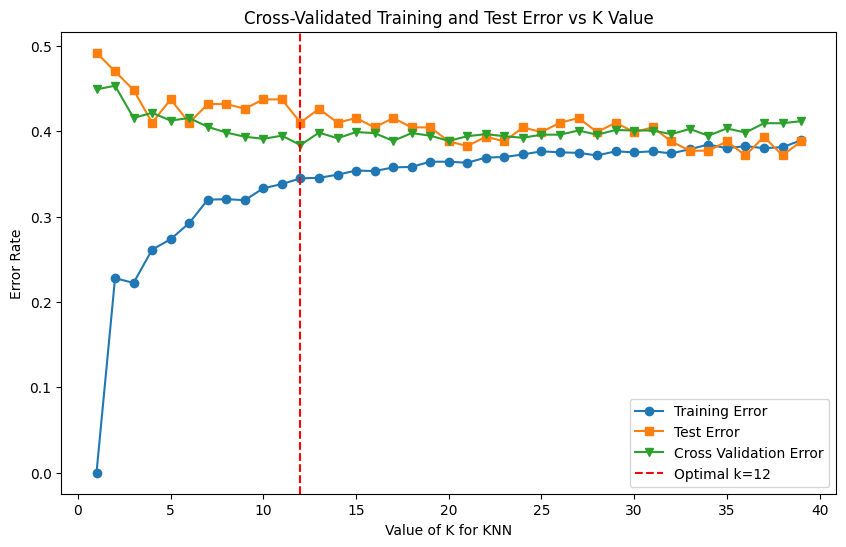

In [173]:
plt.figure(figsize=(10, 6))

plt.plot(k_range, k_scores_train, label='Training Error', marker='o')
plt.plot(k_range, k_scores_test, label='Test Error', marker='s')
plt.plot(k_range, k_cross_scores, label='Cross Validation Error', marker='v')

plt.xlabel('Value of K for KNN')
plt.ylabel('Error Rate')
plt.title('Cross-Validated Training and Test Error vs K Value')

plt.axvline(x=best_k, color='r', linestyle='--', label=f'Optimal k={best_k}')

plt.legend()
plt.show()

### **Observations from the Graph**

- **Overfitting at Low k-values:** When 'k' is small (especially at k=1), the model achieves perfect accuracy on the training data, indicative of overfitting. As 'k' increases, the training error rises, and the test error generally decreases which shows a reduction in overfitting.

- **Underfitting at High k-values:** Larger 'k' values tend to generalize better to unseen data, reducing test errors but excessively large 'k' can lead to underfitting.

- **Cross-Validation:** The cross-validation error doesn't always grow according to 'k'. This behavior shows the importance of cross-validation in identifying a 'k' that ensures a model that is balanced between known data and unseen data. This pattern shows the delicate balance between avoiding overfitting with lower 'k' values and the risk of underfitting with higher 'k' values, despite the smaller errors.

- **Odd vs. Even k-values:** Odd values of 'k' generally outperform even values, likely due to the nature of KNNs where an even 'k' can lead to equal votes among competing classes.

**Reference used (KNN Introduction):** https://www.codecademy.com/learn/introduction-to-supervised-learning-skill-path/modules/k-nearest-neighbors-skill-path/cheatsheet

### **Optimal 'k' Selection**

We have chosen a 'k' of 12 since it shows the most balanced performance between overfitting and underfitting, as evidenced by its superior cross-validation score.

## **Conclusion of Model #1: K-Nearest Neighbours**

Despite our efforts in fine-tuning 'k', the model's performance through iterative cross-validation on the dataset — marked by accuracies of 0.59 and 0.66 — hasn't met our expectations.

This might be due to the fact that there is a relatively weak corellation between out features and the target variable "difficulty". The exploratory analysis, particularly the heatmap, showed that even the most correlated feature, "acceptance_rate", only has a correlation coefficient of -0.39. This is likely a significant contributor to the model's underwhelming performance.


###**Strategies for Improvement**

Given the model's current limitations, we propose some approaches to improve its accuracy:
1. **Extended 'k' Range:** Broadening the range of 'k' values beyond the initial 1 to 40, we may find a more effective 'k' that could improve the model's performance. However, we need to keep in mind that it's crucial to balance the risk of overfitting with smaller 'k' values against underfitting with larger 'k' values.

2. **Data Preprocessing Refinement:** Revisiting our aproach to preprocessing, which is currently centered around MinMax Scaling, could be beneficial. Exploring alternative scaling and standardization techniques could reveal new patterns and correlations that might help the model's performance.

As we progress to subsequent models, we hope that we can achieve a better performance.

# Model #2: Decision Trees

188
0.6065573770491803
0.0016001376425733224


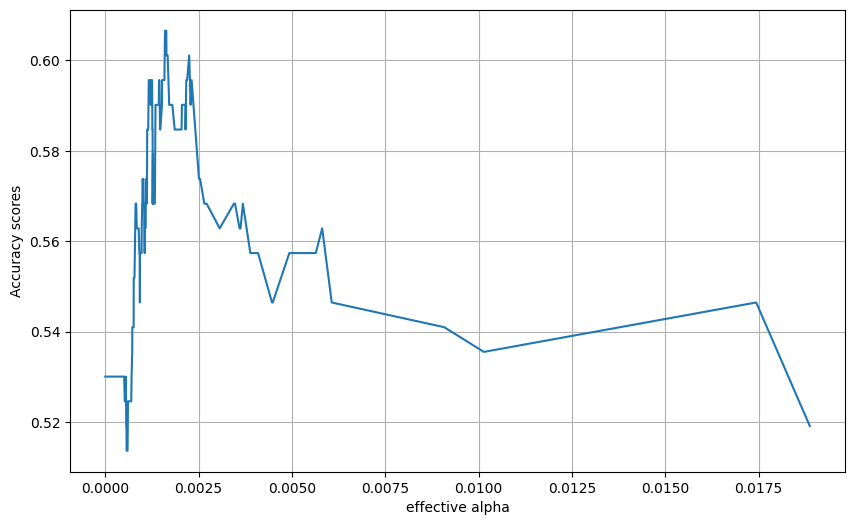

In [188]:
x_data = final_data.drop(['difficulty'], axis=1) # Use all other available columns in our preprocessed dataset for our feature set
y_data = final_data['difficulty'] # The 'difficulty' column is what we are predicting

# Splitting the dataset into training and testing sets to evaluate the model
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=151) #split the data into training and testing


clf = tree.DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")
print(np.argmax(acc_scores))
print(acc_scores[188])
print(ccp_alphas[188])

In [ ]:
y_pred_train = clf_best.predict(X_train)
y_pred_test  = clf_best.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)

test_accuracy = accuracy_score(y_test, y_pred_test)
tree.plot_tree(clf_best)
print("Train accuracy: " + str(train_accuracy))
print("Test accuracy: " + str(test_accuracy))

# Upcoming Models

###**Decision Tree**

https://scikit-learn.org/stable/modules/tree.html

Reason: We are interested in implementing a decision tree because we know that it can be used for multiclass classification problems, and the sklearn implementation specifically can handle these problems when the data are numeric. One of the benefits of this model is that it is referred to as a "white box". This is because the model is understandable, as compared to an obfuscated "black box" that results from using a more complicated model. A decision tree is referred to as a "white box" because the model can easily be visualed into a picture and its rules can be understood. The model makes choices of which route down the tree to take based on different threshold values. Therefore, we will be able to analyze the rules the model is using in order to better understand its performance. This will make apparent which features are most strongly predictive, and what values of those features make certain values of the target more likely.

###**Neural Network**

Reason: We are familiar with neural networks from class, and we know that they can be used to solve classification problems. For example, we used a neural network in HW2 to build a classifier for types of beans based on their attributes. We know how to start solving a multi-class classification problem using a neural net: for example, we're familiar with the different activation functions and loss functions we could use, and we understand structual details, like having as many units in the output layer as we have unique values in our target (in our case, 3 distinct difficulties). We are hopeful that a neural net will be a more successful model because of the hyperparameter tuning we will be able to do. There is a lot of experimentation to be done to optimize the model, so we are eager to attempt to achieve better results using this model.